# Project: 2DEG mobility calculation using mobilitypy¶

The mobility models are implemented using the following refs:

Ref-1: J. Bassaler, J. Mehta, I. Abid, L. Konczewicz, S. Juillaguet, S. Contreras, S. Rennesson, S. Tamariz, M. Nemoz, F. Semond, J. Pernot, F. Medjdoub, Y. Cordier, P. Ferrandis, Al-Rich AlGaN Channel High Electron Mobility Transistors on Silicon: A Relevant Approach for High Temperature Stability of Electron Mobility. Adv. Electron. Mater. 2024, 2400069. https://doi.org/10.1002/aelm.202400069

Ref-2: Zhang, J., Hao, Y., Zhang, J. et al. The mobility of two-dimensional electron gas in AlGaN/GaN heterostructures with varied Al content. Sci. China Ser. F-Inf. Sci. 51, 780–789 (2008). https://doi.org/10.1007/s11432-008-0056-7

Ref-3: 

# 1. Settings

## 1.1 Import modules

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
from pathlib import Path
mobilitypy_tutorial_path = Path().absolute()
sys.path.insert(0, os.path.join(mobilitypy_tutorial_path, '../'))
from mobilitypy import AlloyParams, Mobility2DCarrier, Plottings

In [4]:
save_figure_dir = os.path.join(mobilitypy_tutorial_path, '../imgs')
savefigure = True
fig_dpi = 75

## 1.2 Set physical constants

In [5]:
'''
n_2d => in nm^-2
rms_roughness => nm^-1
corr_len => nm^-1
n_dis => nm^-2
f_dis => unit less
'''
alloy_disordered_effect=1
interface_roughness_effect=1
dislocation_effect=1
deformation_potential_effect=1 
piezoelectric_effect=1
acoustic_phonon_effect=1
polar_optical_phonon_effect=1
total_mobility=1
mobility_model='Bassaler'
density_2deg = 0.1 # nm^-2
irf_rms_roughness = 0.3 # nm
irf_corr_length = 3.0 # nm
dislocation_density = 1e-4 # nm^-2
occup_dislocation = 0.3
T=300 #K

# 2. Calculate mobilities

In [6]:
compositions = np.linspace(0,1,101)
mu2deg = Mobility2DCarrier(compositions=compositions, binaries=['AlN', 'GaN'], alloy='AlGaN', system='ternary')

In [7]:
deg_series = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0] # nm^-2

In [8]:
mobility_dff = {}
for n_2deg in deg_series:
    mobility_dff[n_2deg] = mu2deg.calculate_sheet_mobility(n_2d=n_2deg, rms_roughness=irf_rms_roughness, 
                                                           corr_len=irf_corr_length, n_dis=dislocation_density, 
                                                           f_dis=occup_dislocation, T=T,
                                                           alloy_disordered_effect=alloy_disordered_effect,
                                                           interface_roughness_effect=interface_roughness_effect,
                                                           dislocation_effect=dislocation_effect,
                                                           deformation_potential_effect=deformation_potential_effect,
                                                           piezoelectric_effect=piezoelectric_effect,
                                                           acoustic_phonon_effect=acoustic_phonon_effect,
                                                           polar_optical_phonon_effect=polar_optical_phonon_effect,
                                                           total_mobility=total_mobility,
                                                           calculate_total_mobility_only=True,
                                                           mobility_model=mobility_model)

# 3. Plot mobilities

In [9]:
plt2deg = Plottings(save_figure_dir=save_figure_dir)
x_label = 'Al composition'
y_label = r'Electron mobility ($\mathrm{cm}^2\mathrm{V}^{-1}\mathrm{s}^{-1}$)'

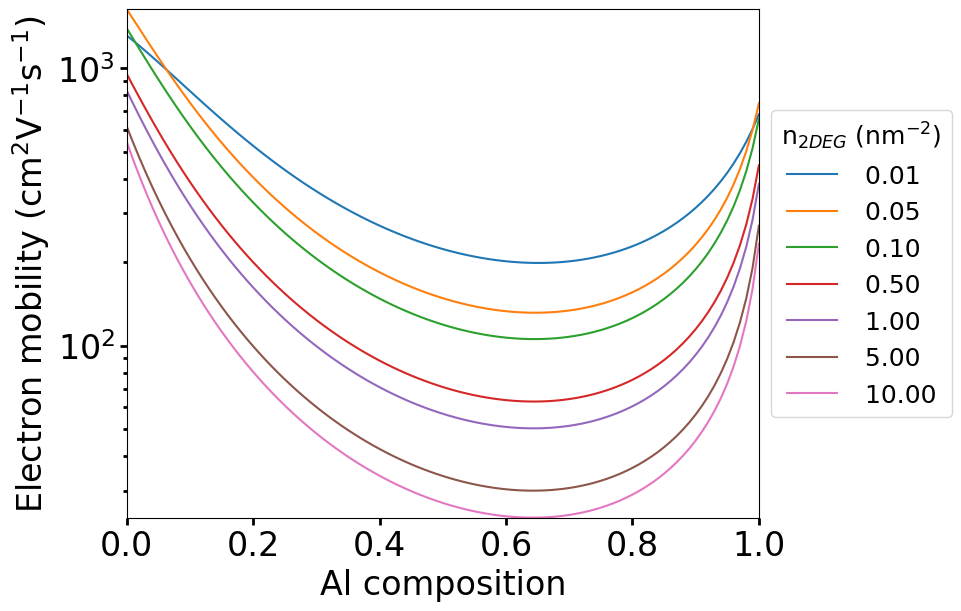

In [10]:
fig, ax = plt.subplots(figsize=(9.5,6),constrained_layout=True)
ymin, ymax = 1e10, 0
legend_text = []
for n_2deg, mobility_df in mobility_dff.items():
    xx = np.array(mobility_df['comp'], dtype=float)
    data_2_plot = np.column_stack((xx, mobility_df['TOT']))
    fig, ax,_ = plt2deg.plot_2d(data_2_plot, fig=fig, ax=ax,
                                             ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True, 
                                             annotate_pos=(11,11), show_right_ticks=False,
                                             yaxis_label=y_label, xaxis_label=x_label,
                                             color=None, color_map='viridis', savefig=0, dpi=75, show_plot=False)
    min_y = mobility_df['TOT'].min()
    max_y = mobility_df['TOT'].max()

    if min_y < ymin: ymin = min_y
    if max_y > ymax: ymax = max_y
    legend_text.append(f'{n_2deg: .2f}')
ax.set_ylim(ymin, ymax)
ax.legend(legend_text,bbox_to_anchor=(1, 0.5),loc='center left', title=r'n$_{2DEG}$ (nm$^{-2}$)')
plt2deg.save_figure('mu_2deg_dependence.png', fig=fig, savefig=savefigure, dpi=fig_dpi, show_plot=False)